# Project: Credit Card Customer Segmentation
---

## Overview
---

In this data science project, I assume the role of a proactive and autonomous data scientist tasked with enhancing the credit card company's business strategies by segmenting their customers effectively. This project mirrors a real-world scenario where I analyze a comprehensive dataset containing diverse variables. The objective is to leverage the dataset's insights to create customer segments that will inform tailored business strategies, optimizing credit card usage and engagement.

**Project Context and Objective**

The "credit card company" I am working for seeks to create distinct customer segments that will guide their strategic decisions. By understanding the unique attributes and behaviors of various customer groups, the company aims to customize credit limits, rewards, and incentives for optimal customer satisfaction and engagement.

**Project Scope and Approach**

The dataset provided by the company contains a wealth of customer information that will be leverage to achieve the project's objectives. Since the data engineering team has already performed data cleaning, I can focus on employing advanced data science techniques to develop a robust customer segmentation model.

During a planning meeting with the Data Science coordinator, it was agreed that the K-means algorithm would be the ideal approach for segmenting the data. The plan entails the following steps:

1. **Exploratory Data Analyze**: Thoroughly understand the dataset's structure, variables, and potential insights. Identify any unusual or outlier variables that might not contribute significantly to the analysis.

2. **Feature Engineering**: Prepare the dataset for modeling by ensuring it is appropriately formatted and cleaned. Handle any categorical variables and missing values as necessary.

3. **Scaling Data**:  Most machine learning algorithms preform better when they variables are scaled. For example, the k-means algorithm computes distances between points of data and a given centroid and when assigning data to a cluster, therefore, if variables in the dataset are of incomparable magnitudes the comparing/optimising of the distances will be effected by these potential large magnitude disparities.

4. **Determine Optimal Clusters**: Utilize the K-means algorithm to determine the most suitable number of customer segments. This step involves selecting the appropriate number of clusters that will lead to meaningful insights.

5. **Analysing the Results**: For each identified segment, analyze and explain the distinctive attributes that define them. This information will guide the credit card company in designing targeted strategies for each segment.

6. **Short Conclusion and Further Work**: Recommendations for the credit card company on which cluster(s) to target for advertising and promotional campaigns. Then finished off with a consideration for future work/analysis.

**Data Exploration and Analysis**

Upon loading the 'customer_segmentation.csv' dataset using the pandas library, I will delve into the dataset's characteristics:

- Assess the dataset's size and number of columns, identifying columns that may not contribute significantly to the analysis.
- Examine the types of data within each column, particularly noting categorical variables and addressing any data type inconsistencies.
- Handle any missing values that might affect the accuracy of the analysis.
- Investigate correlations between variables to uncover relationships that might inform segment creation.
- Visualize the distribution of each numeric column using matplotlib and seaborn libraries. These visualizations will provide insights into the central tendencies and spreads of various variables.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import Markdown, display

sns.set_style('whitegrid')
%matplotlib inline

In [32]:
# Display Markdown using IPython.display
def display_markdown(content):
    display(Markdown(content))

## 1. Exploratory Data Analyze
---

To start here's a breakdown of the variables in the dataset:

1. **customer_id**: A unique identifier for each customer.
2. **age**: Customer age in years.
3. **gender**: Customer gender (M or F).
4. **dependent_count**: Number of dependents of each customer.
5. **education_level**: Level of education ("High School", "Graduate", etc.).
6. **marital_status**: Marital status ("Single", "Married", etc.).
7. **estimated_income**: The estimated income for the customer projected by the data science team.
8. **months_on_book**: Time as a customer in months.
9. **total_relationship_count**: Number of times the customer contacted the company.
10. **months_inactive_12_mon**: Number of months the customer did not use the credit card in the last 12 months.
11. **credit_limit**: Customer's credit limit.
12. **total_trans_amount**: The overall amount of money spent on the card by the customer.
13. **total_trans_count**: The overall number of times the customer used the card.
14. **avg_utilization_ratio**: Daily average utilization ratio.

This dataset provides a comprehensive view of each customer's attributes and behaviors. The variables include demographic information (age, gender, education, marital status), financial aspects (income, credit limit, transaction amounts), and engagement metrics (months as a customer, contact frequency, utilization ratio).

### 1.1. Raw Data Overview
Now we will get an understanding of the shape of the data, and check for missing cells if any:

In [33]:
# Read the dataset into a pandas DataFrame
raw_df = pd.read_csv('data/customer_segmentation.csv')

# Dataset Overview
display_markdown("#### Dataset Overview:")
display_markdown(f"Number of rows: {raw_df.shape[0]}")
display_markdown(f"Number of columns: {raw_df.shape[1]}")\
    
# Random sample of 5 rows
display_markdown("#### First look at dataset sample random five:")
display(raw_df.sample(5))

# Column types
column_types = raw_df.dtypes
display_markdown("#### Column Types:")
display(column_types)

# Check for missing data
missing_data = raw_df.isnull().sum()
display_markdown("#### Missing Data Summary:")
display(missing_data)

# Statistical summaries
summary_statistics = raw_df.describe()
# adding median and mode as this gives insights into the distributions
summary_statistics.loc['median'] = raw_df.median(numeric_only=True)
summary_statistics.loc['mode'] = raw_df.mode(numeric_only=True).iloc[0]
display_markdown("### Summary Statistics:")
display(summary_statistics)

#### Dataset Overview:

Number of rows: 10127

Number of columns: 14

#### First look at dataset sample random five:

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
8072,823149483,52,F,1,Post-Graduate,Single,50000,48,1,5,1766.0,4643,76,0.000
10024,789497283,50,M,2,High School,Single,162000,42,1,3,34162.0,7572,56,0.050
605,758317233,35,F,1,College,Single,118000,28,4,5,3518.0,2121,60,0.448
7453,714735033,45,F,5,Doctorate,Married,21000,34,4,2,1438.3,4376,84,0.341
2420,719976558,47,M,2,Graduate,Unknown,76000,34,3,2,4249.0,1881,49,0.368


#### Column Types:

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

#### Missing Data Summary:

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

### Summary Statistics:

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000
median,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
mode,7.080821e+08,44.000000,3.000000,22000.000000,36.000000,3.000000,3.000000,34516.000000,4253.000000,81.000000,0.000000


From above we can see that:
- There are 10127 rows of data
- 11 numerical columns
- 3 catagorical colums that need converting to numerical types
    - `gender`
    - `education_level`
    - `marital_status`
- no missing data

Now before looking at the distribution and correlations Feature Engineering will be preformed in order to include the catagorical (non-numnerical) data in the analysis.

## 2. Feature Engineering
---

### 2.1  `gender` Column Numericalised
Starting the the `gender` column. Unfortunately the data is binary which is not inclusive but easier to numericalise.

In [34]:
# First making a number df for numerical values only
numerical_df = raw_df.copy()

# 1 .gender: This column contains categorical values ('M' or 'F'). 
# Using binary encoding where 'M' becomes 0 and 'F' becomes 1.

# using apply and a lambda function
numerical_df['gender'] = raw_df['gender'].apply(lambda x: 0 if x == 'M' else 1)


# display the raw data and numerical dataframes for comparison/sanity check
display_markdown("#### raw_data: Gender Column Freq Table:")
display(raw_df['gender'].value_counts())
display_markdown("#### num_data: Gender Column Freq Table:")
display(numerical_df['gender'].value_counts())

#### raw_data: Gender Column Freq Table:

gender
F    5358
M    4769
Name: count, dtype: int64

#### num_data: Gender Column Freq Table:

gender
1    5358
0    4769
Name: count, dtype: int64

### 2.2  `education_level` Column Numericalised

Next the `education_level` column which can be numericalise without one-shot encoding as their is a magnitude to this data. The order is ascending from the level educaiton level `Uneducated = 0` to `Doctorate = 5`

In [35]:
# 2. education_level: This column represents categorical education levels. 
# You can use one-hot encoding to create binary columns for each level.
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}


# Map education levels to numerical values
numerical_df['education_level'] = raw_df['education_level'].map(education_mapping)

# display the raw data and numerical dataframes for comparison/sanity check
display_markdown("#### raw_data: Education Level Column Freq Table:")
display(raw_df['education_level'].value_counts())
display_markdown("#### num_data: Education Level Column Freq Table:")
display(numerical_df['education_level'].value_counts().sort_index())

#### raw_data: Education Level Column Freq Table:

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

#### num_data: Education Level Column Freq Table:

education_level
0    1755
1    2351
2    1192
3    3685
4     616
5     528
Name: count, dtype: int64

### 2.3  `marital_status` Column Numericalised

Now for the `marital_status` column which is a little more trickly as the data is not simply binary and there is no magnitude to these categories. The `raw_data['martical_status']` frequency table is as follows:

| marital_status | Count |
|----------------|-------|
| Married        | 4687  |
| Single         | 3943  |
| Unknown        | 749   |
| Divorced       | 748   |



**Additional Inforamtion: Understanding One-Hot Encoding and Using `drop_first=True`**

When you perform one-hot encoding using `pd.get_dummies()`, it creates dummy variables for each category in the original categorical column. Each category gets its own binary column, and a value of 1 is placed in the corresponding column if the category is present, while the other columns have a value of 0. This process allows you to convert categorical variables into a numerical format that can be used in various data analysis and modeling tasks.

**One-Hot Encoding and Its Purpose:**

One-hot encoding is used to transform categorical variables into a format that can be effectively used in machine learning algorithms and statistical analyses. It's particularly useful when dealing with non-ordinal categorical variables like gender, marital status, and education level.

**Benefits of drop_first=True:**

Using `drop_first=True` has several benefits:

1. **Reducing Multicollinearity**: When you have a set of dummy variables, including all of them in a model can lead to multicollinearity. Multicollinearity occurs when independent variables in a regression model are correlated with each other. By dropping the first dummy variable, you remove redundant information and minimize multicollinearity.

2. **Interpretability**: Without `drop_first=True`, you would have a reference category (the first category) that all other categories are compared to. However, in many cases, it's more intuitive to compare categories directly with each other rather than against a reference category.

3. **Efficiency**: By dropping the first dummy variable, you reduce the dimensionality of your dataset. This can lead to more efficient storage and computation, especially when working with large datasets.

**One-Hot Encoding and Non-Ordinal Categorical Variables:**

One-hot encoding is particularly well-suited for non-ordinal categorical variables. These are variables where the categories don't have a natural order or hierarchy. For instance, in the 'marital_status' column with categories 'Single', 'Married', and 'Divorced', there isn't a clear ordinal relationship between these categories.

**When to Use drop_first=True:**

- When dealing with categorical variables with non-ordinal relationships (like gender, marital status, etc.), using `drop_first=True` is generally a good idea. The categories in such cases don't inherently have a hierarchical relationship, and you're interested in comparing the categories directly.

**When Not to Use drop_first=True:**

- If you're dealing with categorical variables where there is an ordinal relationship (e.g., education level: "High School" < "College" < "Graduate"), dropping the first category might not be appropriate, as you'd lose information about the order of categories.

In summary, one-hot encoding and the `drop_first=True` parameter provide a powerful tool to handle categorical variables, making them suitable for analysis and modeling. By understanding the nature of your data and the relationships between categories, you can make informed decisions about when to apply these techniques for optimal results. Always consider the context of your data and the goals of your analysis before deciding to use them.

In [36]:
# Create dummy variables for marital_status
marital_dummies = pd.get_dummies(raw_df[['marital_status']], 
                                 drop_first=True, 
                                 prefix='marital', 
                                 dtype=int
                                 )
numerical_df = pd.concat([numerical_df, marital_dummies], axis=1)
numerical_df.drop(['marital_status'], axis=1, inplace=True)

# display the raw data and numerical dataframes for comparison/sanity check
display_markdown("#### num_data Shape:")
display(numerical_df.shape)
display_markdown("#### num_data First 5 rows:")
display(numerical_df.head())

#### num_data Shape:

(10127, 16)

#### num_data First 5 rows:

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_Married,marital_Single,marital_Unknown
0,768805383,45,0,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,1,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,0,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,1,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,0,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


### 2.4  Linear and Non-linear Correlation Heat-Map Visulisation

Next a heatmap showing the linear and nonlinear correlation between each variable/column is presented. But first let's delve into linear and non-linear correlations, specifically focusing on the Spearman rank correlation, when to use it, when not to use it, and other non-linear correlation techniques.

**Linear Correlation:**

Linear correlation measures the strength and direction of a linear relationship between two continuous variables. The most common measure of linear correlation is the Pearson correlation coefficient, which ranges from -1 to 1. A value closer to 1 indicates a strong positive linear relationship, while a value closer to -1 indicates a strong negative linear relationship. A value near 0 suggests little or no linear correlation.

**Non-Linear Correlation:**

Non-linear correlation exists when the relationship between variables is not adequately captured by a linear model. In this case, traditional linear correlation measures like Pearson might not be suitable. Non-linear correlations can be complex and can involve various functional forms.

**Spearman Rank Correlation:**

The Spearman rank correlation is a non-parametric measure of the strength and direction of monotonic relationships between variables. It assesses whether, as one variable increases, the other variable tends to increase as well, regardless of the specific functional form of the relationship. It's calculated based on the ranks of the variables rather than their actual values.

**Why Use Spearman:**

1. **Monotonic Relationships**: Spearman is useful when the relationship between variables is monotonic (increasing or decreasing) but not necessarily linear.
2. **Non-Normal Data**: Spearman can be used when the variables are not normally distributed or when there are outliers.
3. **Ordinal Data**: Spearman can handle ordinal data, where the relationship is based on the order of categories.

**When Not to Use Spearman:**

1. **Linear Relationships**: If the relationship between variables is linear, using Pearson correlation might be more appropriate.
2. **Continuous Data**: If your data is continuous and normally distributed, Pearson correlation might provide more insights.

**Other Non-Linear Correlation Techniques:**

1. **Kendall's Tau**: Similar to Spearman, Kendall's Tau is a non-parametric correlation measure that assesses the strength and direction of monotonic relationships. It focuses on concordant and discordant pairs of data points.
2. **Distance Correlation**: This measures dependence between variables by comparing distances in high-dimensional space. It's more general and can capture non-linear relationships.
3. **Mutual Information**: Measures the amount of information shared between variables. It can capture any type of relationship, linear or non-linear.
4. **Local Correlation**: Techniques like Local Correlation Integral (LCI) assess the non-linear dependence between variables in a localized manner.

**Summary:**

Spearman rank correlation is valuable for identifying non-linear monotonic relationships and can be especially useful for ordinal data, non-normal data, and situations where linear correlation may not be suitable. However, if you suspect a complex, non-monotonic non-linear relationship, it might be worth exploring other non-linear correlation techniques or even non-parametric methods for dependence analysis. The choice of correlation method should align with the characteristics of your data and the nature of the relationships you aim to uncover.

In [37]:
# And overly complicated, but Beautiful heat map created using scatterplots
# TODO: improve the customisation with kwargs


def heatmap(x, y, **kwargs):
    
    
    """
    Create a heatmap visualization using scatter plots.

    Parameters:
        x (list): List of x-axis data values.
        y (list): List of y-axis data values.
        **kwargs: Additional keyword arguments for customization.
            - color: List of colors for data points.
            - palette: Color palette for mapping data values to colors.
            - color_range: Range of values to be mapped to the palette.
            - size: List of sizes for data points.
            - size_range: Range of sizes for data points.
            - size_scale: Scaling factor for sizes.
            - marker: Marker style for scatter plot.
            - x_order: Order of x-axis categories.
            - y_order: Order of y-axis categories.
            - title: Title for the main scatter plot.
    
    Returns:
        None
    """


    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)
        
    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 
        
    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]
    
    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)
    
    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)
        
    size_scale = kwargs.get('size_scale', 500)
    
    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}
    
    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot
        
    marker = kwargs.get('marker', 's')
    
    if 'title' in kwargs:
        title = kwargs['title']
    else:
        title = 'No Figure Title Set '
    
    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order', 'title'
    ]}
    
    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right', color='grey')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num], color='grey')
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    
    
    # Set the title for the main scatter plot
    #ax_scatter = plt.gca()  # Get the current axis for the main scatter plot
    ax.set_title(kwargs.get('title', 'No Figure Title Set'), fontsize=20, 
                 fontweight='bold', color='grey', loc='left',
                 linespacing=1, wrap=True,
                 )

    
    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = y[1] - y[0]
        ax.barh(
            y=y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 
        ax.yaxis.set_ticks_position('none')
        

def corrplot(data, size_scale=500, marker='s', title='No Figure Title Set'):
    """
    Create a correlation heatmap plot.

    Parameters:
        data (pd.DataFrame): Input DataFrame containing correlation data.
        size_scale (int): Scaling factor for scatter plot point sizes.
        marker (str): Marker style for scatter plot.
        title (str): Title for the plot.

    Returns:
        None
    """
    
    sns.set(color_codes=True)
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale,
        title=title  # Pass the title parameter to heatmap
    )
    sns.set(color_codes=False)

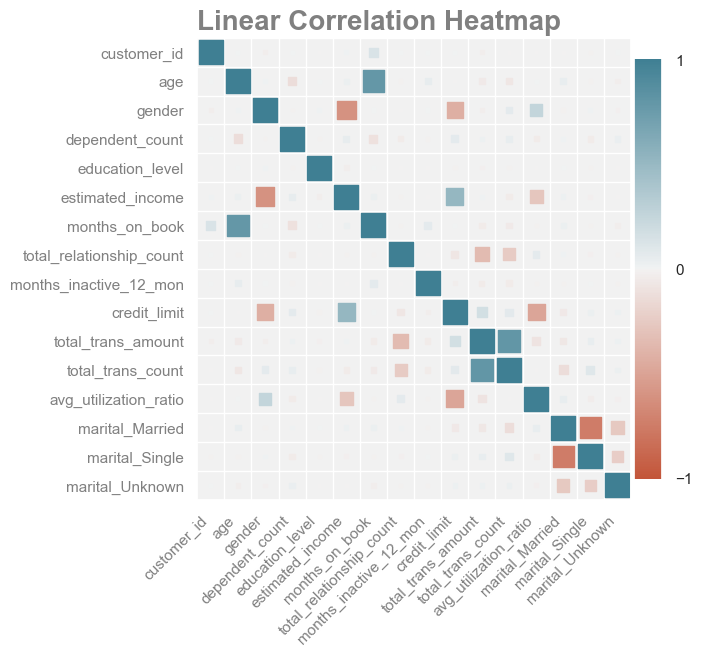

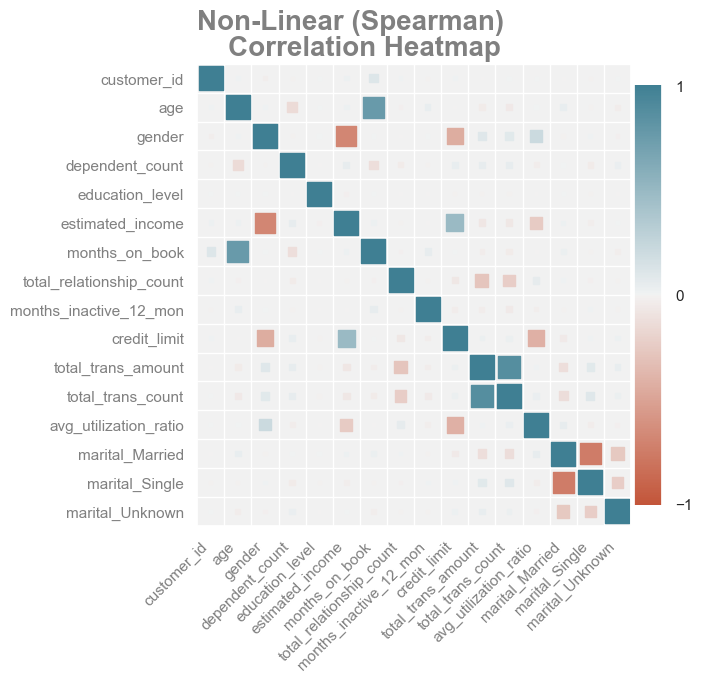

In [38]:
# Calculate linear and non-linear correlation matrices
linear_correlation_matrix = numerical_df.corr(numeric_only=True)
non_linear_correlation_matrix = numerical_df.corr(numeric_only=True, method='spearman')


# Linear Correlation Heatmap
plt.figure(figsize=(6, 6))
corrplot(data=linear_correlation_matrix, size_scale=300, title="Linear Correlation Heatmap")
#sns.set(style="dark")
#plt.show()

# Non-Linear (Spearman) Correlation Heatmap
plt.figure(figsize=(6, 6))
corrplot(data=non_linear_correlation_matrix, size_scale=300, title="Non-Linear (Spearman) \n    Correlation Heatmap")
plt.show()


Next creating a dictionary of highly positive and negatively correlated pairs:

In [39]:
def get_correlated_pairs(df, correlation_method='pearson', threshold=0.7) -> pd.DataFrame:
    """
    Get correlated pairs from a DataFrame using a specified correlation method and threshold.

    Parameters:
    df (DataFrame): The input data frame.
    correlation_method (str): The correlation method to use (default: 'pearson').
    threshold (float): The correlation threshold to consider (default: 0.7).

    Returns:
    dict: A dictionary containing correlated pairs and their correlation scores.
    """

    # Calculate the correlation matrix
    correlation_matrix = df.corr(method=correlation_method)

    # Initialize an empty dictionary to store correlated pairs and scores
    correlated_pairs = {}

    # Iterate through the correlation matrix
    for row in range(len(correlation_matrix)):
        for col in range(row + 1, len(correlation_matrix)):
            correlation_score = correlation_matrix.iloc[row, col]
            if abs(correlation_score) >= threshold:
                pair = (correlation_matrix.index[row], correlation_matrix.columns[col])
                correlated_pairs[pair] = correlation_score

    # Sort the correlated pairs by correlation score (positive to negative)
    sorted_correlated_pairs = dict(sorted(correlated_pairs.items(), key=lambda x: x[1], reverse=True))

    corr_df = pd.DataFrame(sorted_correlated_pairs.items(), 
                     columns=['Correlated Pair', 'Correlation Score']
                     )
    return corr_df

In [40]:
corr_pairs_df = get_correlated_pairs(numerical_df, threshold=0.4)
display_markdown("#### Correlated pairs and their scores")
display(corr_pairs_df)


#### Correlated pairs and their scores

,Correlated Pair,Correlation Score
0,"(total_trans_amount, total_trans_count)",0.807192
1,"(age, months_on_book)",0.788912
2,"(estimated_income, credit_limit)",0.515863
3,"(gender, credit_limit)",-0.420806
4,"(credit_limit, avg_utilization_ratio)",-0.482965
5,"(gender, estimated_income)",-0.601792
6,"(marital_Married, marital_Single)",-0.741185


**Correlation Observations**
- There appears to be little difference between linear and non-linear correlations

- The is a negative correlation between `gender` and `estimate_income` which given gender is mapped as `{'male' : 0, 'female' : 1}` there is like a significant differnce between gender incomes. To investigate this a comparative density plot will help analysis any differnences here. This will be done in the next section.

- The gender income difference is also highlighted by the inverse correlation of `credit_limit`

- `credit_limit` and `avg_utilization_ratio` is negatively correlated, which aligns with the positive correlation between `avg_utilization_ratio` and `gender` suggesting woman shop more than men but have less spending power. Furthermore, there is a weak positive correlation between `gender` (woman) and `total_trans_amount`and `total_trans_count` again showing woman spend more in total and spend more often when compared to men. 

- Due to the income differnce between genders the marital status of the customers may have some influence on spending habits and buying power. It would be presumptuous to assume that a two person income household that has higher spending power also spends more in total. To analysis this the genders and marital status would need to be grouped as the heat-maps above show a Negative correlation between `martical_Married` and `total_trans_amount` and `total_trans_count`, which is likely being influenced by gender so provide little insights. The opposite correlation is true for `martial_Single` and spending totals and count.

- Lastly, there is a weak positive correlation between `dependent_count` (number of children) and spend total and spend frequency suggesting those with kids spend more, which seems reasonable.

- `age` and `months_on_book` are strongly correlated which also seems reasonable.

### 2.5  Distributions

Now for the distribution of the now numerical varibles, but first Let's delve into the mathematical details of how the distribution of variables affects linear and non-linear correlation.

**Linear Correlation (Pearson's Correlation Coefficient):**

1. **Normal Distribution:**
   
   Pearson's correlation coefficient, denoted as $(r)$, measures the linear relationship between two variables, $(X)$ and $(Y)$. If both $(X)$ and $(Y)$ are normally distributed, the correlation coefficient is given by:

   $$[r = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}}]$$

   In this case, \(r\) provides an accurate measure of the strength and direction of the linear relationship.

2. **Non-Normal Distributions:**

   When \(X\) and \(Y\) are not normally distributed, $(r)$ can still measure linear relationships but might be less reliable due to non-linearity or outliers. Data transformations, like taking logarithms or square roots, can help make the variables more normal and improve the accuracy of the correlation coefficient.

3. **Non-Linearity:**

   If \(X\) and \(Y\) have a non-linear relationship (e.g., $(Y)$ increases exponentially with $(X)$, $(r)$ may not capture this relationship well, and the correlation coefficient might be close to zero even though a strong non-linear relationship exists. In such cases, non-linear correlations like Spearman's or Kendall's tau should be considered.

**Non-Linear Correlation (Spearman's Rank Correlation):**

Spearman's rank correlation, denoted as $(\rho)$, is a non-parametric measure of association that assesses the strength and direction of a monotonic relationship between two variables. It is less sensitive to the distribution of variables and can capture non-linear relationships effectively.

1. **Distribution Shape:**

   Spearman's rank correlation focuses on the ranks of data points rather than their actual values. It is calculated as:

   $$[\rho = 1 - \frac{6\sum{d_i^2}}{n(n^2 - 1)}]$$

   where $(d_i)$ is the difference in the ranks of corresponding data points in $(X)$ and $(Y)$, and $(n)$ is the number of data points.

   Because it relies on ranks, Spearman's correlation is less influenced by the shape of the variable distributions. It can capture monotonic relationships regardless of whether the data is normally distributed or not.

2. **Monotonicity:**

   Spearman's rank correlation is well-suited to detecting monotonic relationships, whether they are linear or non-linear. It assigns a higher correlation value when the ranks of $(X)$ and $(Y)$ consistently increase or decrease together, making it effective for non-linear relationships.

3. **Robustness:**

   This measure is robust to outliers because it doesn't rely on the actual values but on their ranks. Outliers can affect the ranking of individual data points but often have less impact on the overall correlation value.

In summary, the choice between linear and non-linear correlation measures depends on the nature of the data and the relationships you want to explore. Linear correlations like Pearson's are suitable for linear relationships between normally distributed variables, while non-linear correlations like Spearman's rank correlation are more versatile, robust, and effective in capturing monotonic relationships, whether they are linear or non-linear, and are less affected by variable distributions.

In [41]:
def plot_df_distributions(df, subplot_height=4):
    """
    Plots distribution plots for numeric columns in a DataFrame.

    Parameters:
    df (DataFrame): The input data frame.
    subplot_height (int): The height of each subplot in the figure (default: 4).

    Returns:
    None
    """

    # Get a list of numeric columns in the DataFrame
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate the number of subplot rows
    num_rows = len(numeric_columns) // 3
    if len(numeric_columns) % 3 != 0:
        num_rows += 1

    # Create a figure with subplots
    plt.figure(figsize=(20, subplot_height * num_rows))

    # Loop through each numeric column and create a subplot
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, 3, i)  # Create a subplot in the grid
        sns.histplot(df[column], bins=20, kde=True)  # Create a histogram with a kernel density estimate
        plt.title(f'Distribution of {column}', 
                  fontsize=16, fontweight='bold', 
                  color='grey', wrap=True)  # Add a title to the subplot
        
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


### Comparing mean, median and mode of numerical columns:

,Mean,Median,Mode
customer_id,7.391776e+08,7.179264e+08,708082083.0
age,4.632596e+01,4.600000e+01,44.0
gender,5.290807e-01,1.000000e+00,1.0
dependent_count,2.346203e+00,2.000000e+00,3.0
education_level,2.063197e+00,2.000000e+00,3.0
estimated_income,6.207821e+04,5.000000e+04,22000.0
months_on_book,3.592841e+01,3.600000e+01,36.0
total_relationship_count,3.812580e+00,4.000000e+00,3.0
months_inactive_12_mon,2.341167e+00,2.000000e+00,3.0
credit_limit,8.631954e+03,4.549000e+03,34516.0


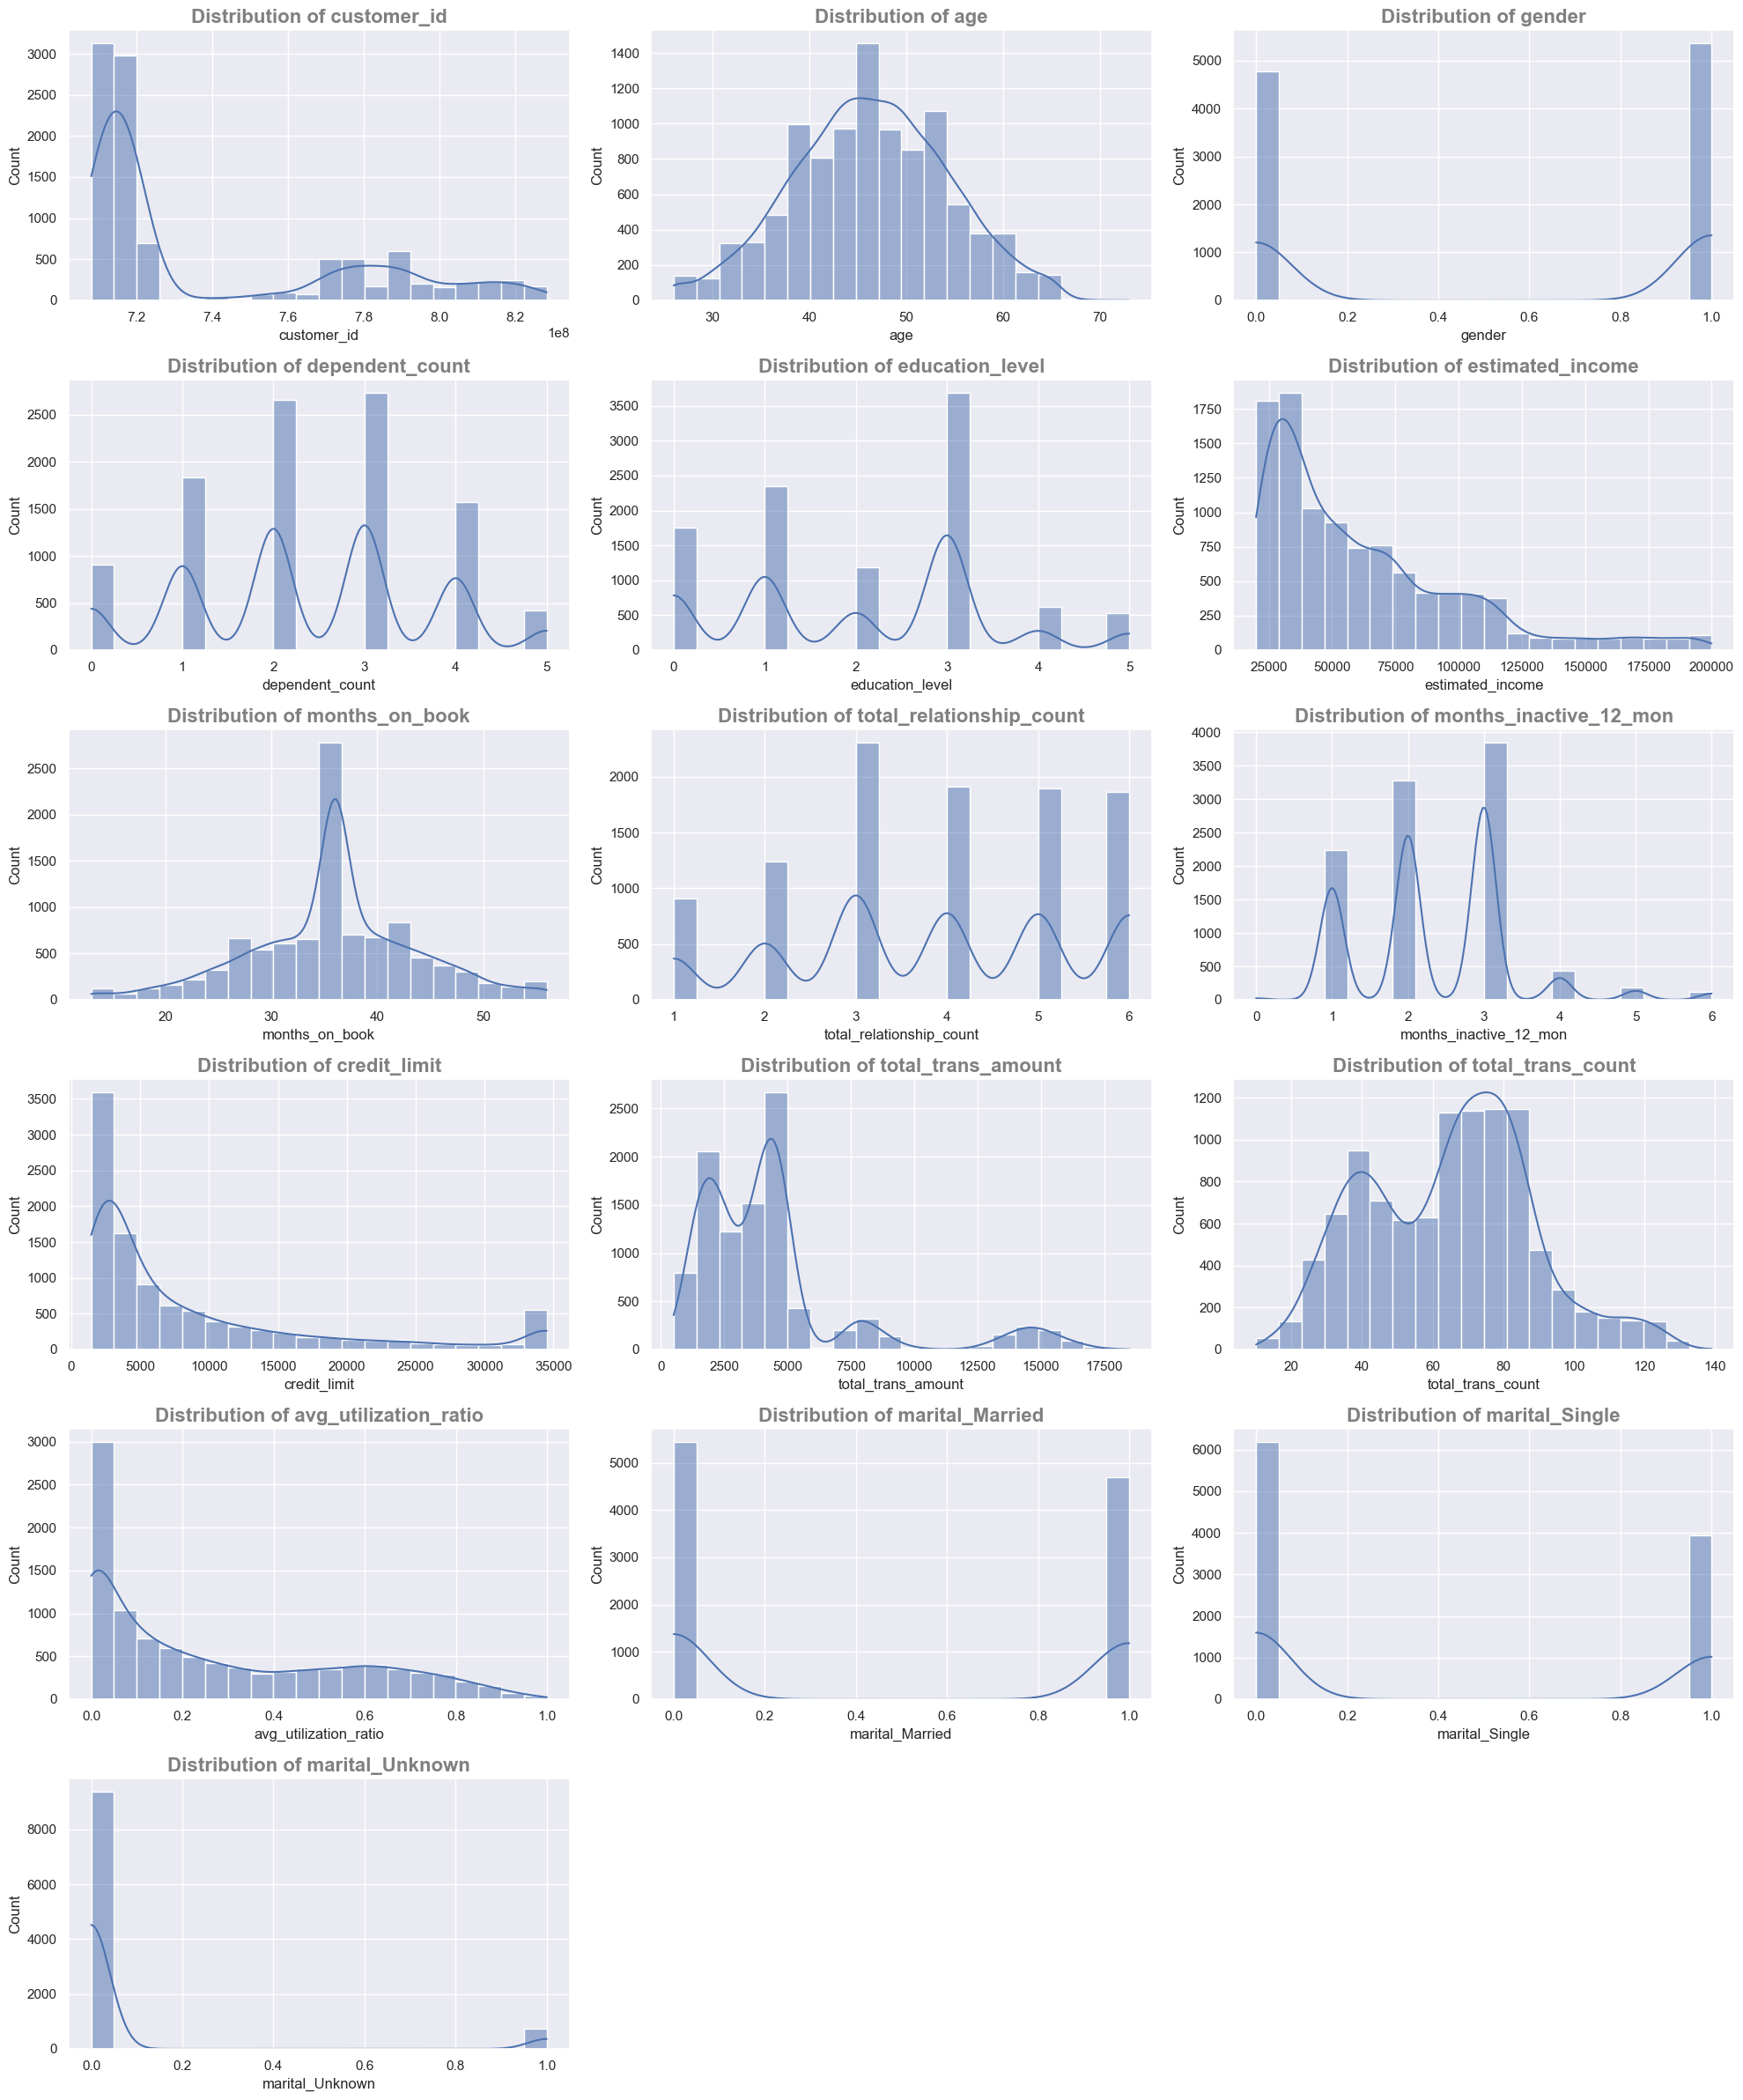

In [42]:
# Comparing mean, median and mode of numerical columns
display_markdown("### Comparing mean, median and mode of numerical columns:")

# Calculate median for numeric columns
median_data = numerical_df.median(numeric_only=True)

# Calculate mode for numeric columns
mode_data = numerical_df.mode(numeric_only=True).iloc[0]

# Calculate mean for numeric columns
mean_data = numerical_df.mean(numeric_only=True)

# Combine mean, median, and mode into a single DataFrame
comparison_data = pd.concat([mean_data, median_data, mode_data], axis=1)
comparison_data.columns = ['Mean', 'Median', 'Mode']
display(comparison_data)

    
plot_df_distributions(numerical_df)


#### Gender vs income freqeuncy table

,Male,Female
estimated_income,,
"(20000, 40000]",306,3616
"(40000, 60000]",798,1209
"(60000, 80000]",1395,169
"(80000, 100000]",803,97


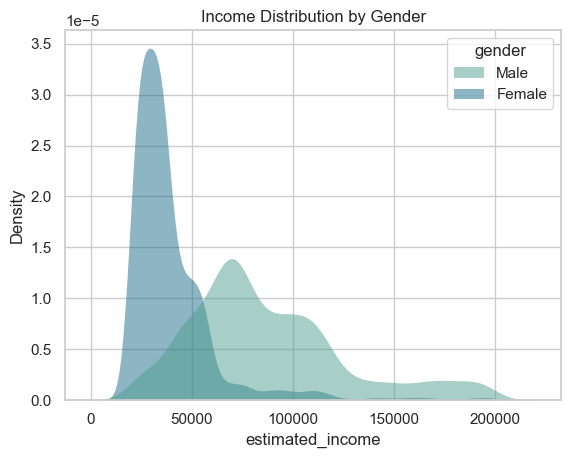

In [43]:

# Creating bined frequency table of gender and income groups
# Define income ranges
income_ranges = [20000, 40000, 60000, 80000, 100000]

# Create a new column for income ranges
income_range_df = pd.cut(numerical_df['estimated_income'], bins=income_ranges)

# Create a frequency table using crosstab
frequency_table = pd.crosstab(index=income_range_df, columns=numerical_df['gender'])

# Rename the columns for better labeling
frequency_table.columns = ['Male', 'Female']
display_markdown('#### Gender vs income freqeuncy table')
display(frequency_table)

# Create KDE plot using Seaborn
sns.set_style("whitegrid")
ax = sns.kdeplot(
    data=numerical_df, x="estimated_income", hue="gender",
    fill=True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0,
)

# Modify legend labels
legend = ax.get_legend()
for text, label in zip(legend.texts, ['Male', 'Female']):
    text.set_text(label)

# Set plot title
ax.set_title("Income Distribution by Gender")

# Show the plot
plt.show()

**Distribution Observations**
- `dependent_count` and `age` are the only variables of normal distribution. The rest are skewed; bimodal; and skewed and bimodal.
- `total_trans_amount` is large 'right skewed bimodal' but has two small normal distribution pecks to the right, showing two groups of above average and well above average big spenders.
- The "Income Distribution by Gender" plot above show a clear inequality between and comes with women and in much less than men which confirms why spending amounts and frequency was negatively correlated as it appears woman spend more and more often than men. This show men are an under utilised and under valued as they have clear ability to spend more. How this could also be influenced by the married martical status grounp, where the woman does the shopping, but if men have credit cards under their name they are not being used at the same rate as woman.

## 3. Scaling the Data
---

**Data Scaling: An Overview**

Data scaling, also known as feature scaling or normalization, is a preprocessing technique used in data analysis and machine learning to transform variables to a specific range or distribution. It ensures that different variables with varying units or scales contribute equally to analysis and modeling processes. Scaling is essential because many machine learning algorithms are sensitive to the magnitude of input features. Proper scaling can enhance algorithm performance and convergence.

**Why Use Data Scaling?**

1. **Equal Weightage**: Scaling ensures that all features have equal importance when contributing to calculations or model training. This prevents features with larger magnitudes from dominating the process.

2. **Convergence**: Algorithms like gradient descent converge faster when features are within a similar scale, reducing the number of iterations required.

3. **Distance-Based Algorithms**: Scaling is vital for distance-based algorithms like k-means clustering and k-nearest neighbors (KNN). These algorithms use distances between points, which can be distorted by varying feature scales.

4. **Regularization**: Regularization techniques like Ridge and Lasso regression assume that all features are on a similar scale. Inconsistent scales can influence regularization strengths.

**Scaling Methods with scikit-learn:**

1. **Standardization (Z-score normalization)**:
   - **Formula**: $$\frac{x - \mu}{\sigma}$$
   - Scales features to have zero mean and unit variance.
   - Method in scikit-learn: `StandardScaler()`

2. **Min-Max Scaling**:
   - **Formula**: $$\frac{x - \min(x)}{\max(x) - \min(x)}$$
   - Scales features to a specified range, commonly [0, 1].
   - Method in scikit-learn: `MinMaxScaler()`

3. **Robust Scaling**:
   - **Formula**: $$\frac{x - \text{median}(x)}{\text{IQR}(x)}$$
   - Scales using the median and interquartile range (IQR), robust to outliers.
   - Method in scikit-learn: `RobustScaler()`

4. **Normalization (L2 Norm)**:
   - **Formula**: $$\frac{x}{\sqrt{\sum_{i} x_i^2}}$$
   - Scales features to have a unit norm.
   - Method in scikit-learn: `Normalizer()`

**Comparative Table:**

| Scaling Method       | Pros                        | Cons                                | Use Cases                               |
|----------------------|-----------------------------|-------------------------------------|-----------------------------------------|
| Standardization     | - No bound on features    | - Does not preserve data range     | Gaussian-distributed data, algorithms requiring zero-mean features |
| Min-Max Scaling     | - Preserves relationships | - Sensitive to outliers            | Known-bounded data, neural networks     |
| Robust Scaling      | - Robust to outliers      | - May not scale features equally  | Data with outliers                      |
| Normalization       | - Direction-focused scaling | - Sensitive to data distribution  | Text classification, recommendation systems |

Choose the scaling method that best suits your data characteristics and the requirements of your machine learning algorithm. Experimentation may be necessary to identify the most suitable scaling approach.

Now some information that breaks down the fitting and transforming processes using matrices for a generic scaling algorithm. In this example, I'll represent the scaling operation as a linear transformation using a scaling matrix.

**Fitting the Scaler:**

1. **Fitting Step (Matrix Notation):**
   
   - **Input Data**: The original data matrix is $(X)$ of shape $((n, m))$, where $(n)$ is the number of samples and $(m)$ is the number of features.

   - **Fitting Process**: The fitting process involves calculating some transformation coefficients or parameters based on the input data $(X)$. Let's denote these transformation coefficients as a diagonal matrix $(D)$ of shape $((m, m))$.

   - **Fitting Operation (Matrix Notation):**
   
     $$[
     D = \text{Diag}(\theta_1, \theta_2, \ldots, \theta_m)
     ]$$

   Here, $(D)$ is the diagonal matrix with scaling coefficients along its diagonal, and $(\theta_i)$ are the scaling factors for each feature.

**Transforming the Data:**

2. **Transforming Step (Matrix Notation):**
   
   - **Input Data**: The original data matrix is still $(X)$ of shape $((n, m))$.

   - **Transforming Process**: The transforming process involves applying the previously learned diagonal scaling matrix $(D)$ to the input data $(X)$ to obtain the scaled data matrix $(X_{\text{scaled}})$.

   - **Transforming Operation (Matrix Notation):**
   
     $$[
     X_{\text{scaled}} = X \cdot D
     ]$$

   Here, $(X_{\text{scaled}})$ is the scaled data matrix.

In this example, the scaling operation is represented as a diagonal scaling matrix $(D)$, where each diagonal entry $(\theta_i)$ represents the scaling factor for the corresponding feature. The fitting step calculates these scaling factors, and the transforming step applies them to each feature of the data matrix $(X)$.

It's important to note that this is a simplified representation of the process using linear algebra. Real scaling algorithms might involve more complex operations and considerations, but this illustrates the concept of fitting and transforming using matrices.


For this project the `RobustScaler()` will be used due to most the variables not be of normal distribution.

In [44]:
# First need dropping unuseful customer_id column
numerical_df = numerical_df.drop('customer_id', axis=1)

In [45]:
from sklearn.preprocessing import RobustScaler

def robust_scaler(df):
    
    # Creating an instance of the robust scaler
    scaler = RobustScaler()

    # fitting the scaler on the data and transforming/scaling it simulaneously
    scaled_df = scaler.fit_transform(df)
    
    return scaled_df

scaled_df = robust_scaler(numerical_df)

display_markdown("#### Unscaled df:")
display(numerical_df.head())

display_markdown("#### Scaled df:")
display(pd.DataFrame(scaled_df).head())

#### Unscaled df:

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_Married,marital_Single,marital_Unknown
0,45,0,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,49,1,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,51,0,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,40,1,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,40,0,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


#### Scaled df:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.090909,-1.0,0.5,-0.5,0.395833,0.333333,0.5,-1.0,0.956476,-1.065558,-0.694444,-0.239583,1.0,0.0,0.0
1,0.272727,0.0,1.5,0.5,-0.541667,0.888889,1.0,-1.0,0.435477,-1.008702,-0.944444,-0.147917,0.0,1.0,0.0
2,0.454545,-1.0,0.5,0.5,0.895833,0.000000,0.0,-1.0,-0.132863,-0.778186,-1.305556,-0.366667,1.0,0.0,0.0
3,-0.545455,0.0,1.0,-0.5,-0.270833,-0.222222,-0.5,2.0,-0.145198,-1.055115,-1.305556,1.216667,0.0,0.0,1.0
4,-0.545455,-1.0,0.5,-1.0,0.312500,-1.666667,0.5,-1.0,0.019618,-1.192419,-1.083333,-0.366667,1.0,0.0,0.0


## 4. Determine Optimal Clusters
---

The "Elbow Method" is a common technique used for optimizing the number of clusters (k) in a k-means clustering algorithm. It helps you find the most suitable value of k for your data by plotting the within-cluster sum of squares (WCSS) against different values of k and looking for an "elbow point" in the plot. Here's how it works:

**Elbow Method Steps:**

1. **Choose a Range of k Values:**
   Start by selecting a range of potential values for k. Typically, you might consider values from 1 to some upper limit that makes sense for your data. For example, if you think there could be between 1 and 10 clusters, you would consider k values from 1 to 10.

2. **Fit K-Means for Each k:**
   For each value of k in your chosen range, run the k-means clustering algorithm on your data and calculate the WCSS for that value of k. WCSS is the sum of the squared distances between data points and their assigned cluster centroids. You can obtain this value using the `inertia_` attribute in scikit-learn after fitting a KMeans model.

3. **Plot the Elbow Curve:**
   Create a plot where the x-axis represents the values of k (the number of clusters), and the y-axis represents the corresponding WCSS values. As you increase k, the WCSS will generally decrease because each data point can get closer to its assigned centroid. However, the rate at which it decreases will start to slow down at some point.

4. **Identify the Elbow Point:**
   Examine the plot and look for the "elbow" point, which is the point where the WCSS starts to level off or decrease at a slower rate. This point represents a trade-off between model complexity (more clusters) and goodness of fit (lower WCSS). The idea is to choose k at this point, as it indicates a reasonable balance between precision and simplicity.

5. **Select the Optimal k:**
   Based on the plot and the location of the elbow point, select the value of k that you believe provides the best clustering solution for your data. This is your optimal k.

**Interpreting the Elbow Point:**

- If the elbow point is clear and distinct, it's relatively easy to choose the optimal k. However, in some cases, the plot may not have a sharp elbow, making the decision less straightforward. You may need to consider other factors, domain knowledge, or alternative methods.

- It's important to remember that while the elbow method is a useful heuristic, it may not always yield a definitive answer, especially when the data's natural structure is not well-suited to k-means clustering. In such cases, you might explore other clustering techniques or validation metrics.

The elbow method provides a simple and intuitive way to estimate the optimal number of clusters for k-means clustering, but it's important to use it in conjunction with other domain-specific knowledge and validation techniques for a more robust cluster analysis.

In [46]:
def plot_elbow_curve(df, max_clusters=10, rerun=10, plot_elbow=True):
    """
    Plots the elbow curve to help determine the optimal number of clusters for KMeans clustering.

    Parameters:
    df (DataFrame): The input data frame for clustering.
    max_clusters (int): The maximum number of clusters to consider (default: 10).
    rerun (int): The number of times the KMeans algorithm will be run with different centroid seeds (default: 10).
    plot_elbow (bool): If True, plots the elbow curve using Seaborn (default: True).

    Returns:
    List: A list containing the inertias (within-cluster sum of squares) for each number of clusters.
    """
    inertias = []
    
    # looping over n times clusters
    for n_clusters in range(1, max_clusters+1):
        
        # Instantiate the k-mean clusters model
        model = KMeans(n_clusters=n_clusters, n_init=rerun)
        
        # fit and predit the model clusters to the df
        model.fit_predict(df)
        
        # append centroid's inertia sum
        inertias.append(model.inertia_)
        
    if plot_elbow:
        # Create the elbow plot using Seaborn
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 11), inertias, marker='o')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.title('Elbow Method for Optimal k')
        plt.xticks(range(1, 11))  # Adjust x-axis ticks as needed
        plt.show()
    
    return inertias


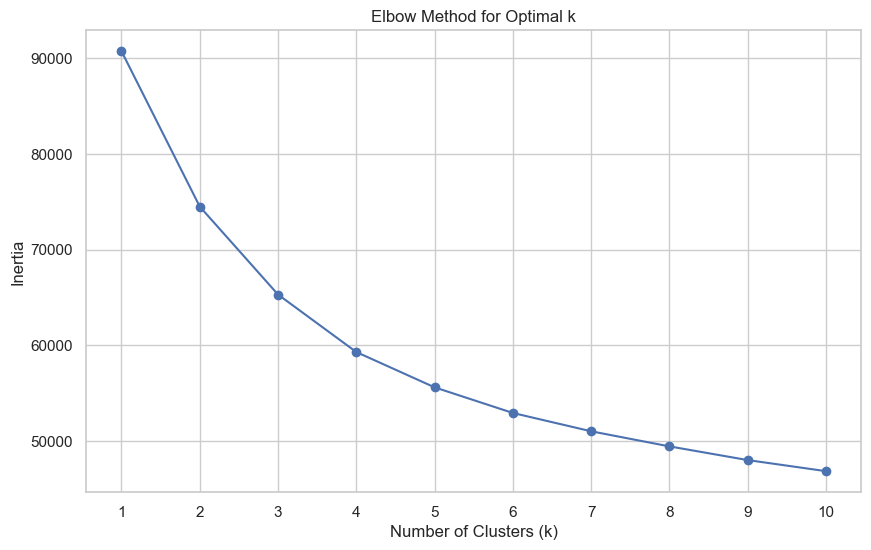

In [47]:
inertias = plot_elbow_curve(df=scaled_df)

**Elbow Curve Observations**

The cure is smooth and shows not sign of a strong "elbow point", which makes picking the number of customer clusters/groups difficult to determine. To help with this decision a bar plot of inertia percentage changes might provide insights, this will be done next

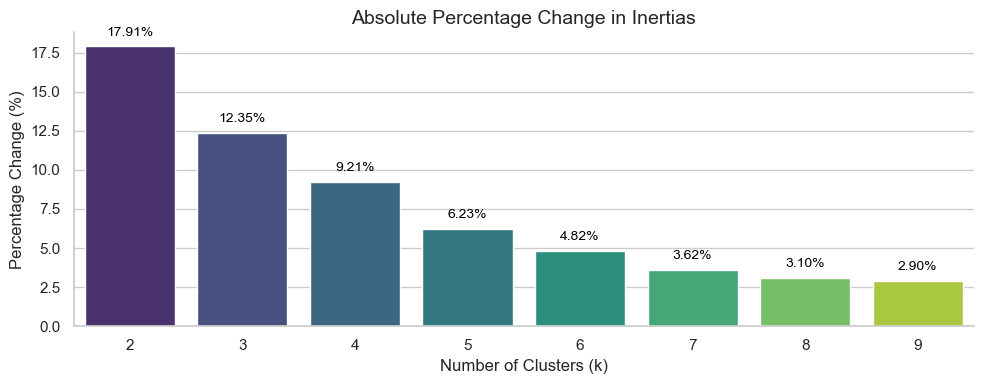

In [48]:
def plot_inertia_percentage_change(inertias):
    """
    Plots the absolute percentage change in inertias to visualize the elbow point for KMeans clustering.

    Parameters:
    inertias (List): A list containing the inertias (within-cluster sum of squares) for each number of clusters.

    Returns:
    None
    """

    # Calculate the absolute percentage change from i to i+1
    percentage_changes = [
        abs((inertias[i+1] - inertias[i]) / inertias[i] * 100)
        for i in range(len(inertias) - 2)
    ]

    # Create a Seaborn bar plot
    plt.figure(figsize=(10, 4))  # Adjust figure size for better visualization
    ax = sns.barplot(x=list(range(2, len(inertias))), y=percentage_changes, palette='viridis')  # Use a color palette for better visualization

    # Add percentages on each bar with better alignment
    for index, value in enumerate(percentage_changes):
        ax.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')  # Adjust vertical alignment and color

    # Add labels and title
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Percentage Change (%)', fontsize=12)
    plt.title('Absolute Percentage Change in Inertias', fontsize=14)

    # Remove top and right spines for cleaner look
    sns.despine()

    # Show the plot
    plt.tight_layout()
    plt.show()
 
plot_inertia_percentage_change(inertias)  


**Inertia precentage change Observations**

- The "most optimal" number of clusters is likely 5 to 7. For this project and for simplicity six clusters will be used. The final model is given below:

In [49]:
# Instantiate the k-mean clusters model
model = KMeans(n_clusters=6, init='k-means++',
               n_init=10, max_iter=1000, tol=1e-6, 
               random_state=1,
               )

# fit and predit the model clusters to the df
y = model.fit_predict(scaled_df)

display_markdown("### Model Output: Cluster Numbers")
display(y)


### Model Output: Cluster Numbers

array([1, 1, 0, ..., 5, 5, 1], dtype=int32)

## 5. Analysing the Results
---

First the clusters numbers will be linked to each customer in the `scaled_df` dataframe.

In [50]:
results_df = raw_df.copy()

results_df['cluster'] = y+1
results_df['cluster'].value_counts()

cluster
6    2423
2    2168
3    1736
1    1565
5    1442
4     793
Name: count, dtype: int64

In [51]:

def cluster_variable_distributions(df, 
                                   cluster_col_name='cluster', 
                                   subplot_hight=3
                                   ) -> None:
    """
    Plots the distribution of numerical variables across different clusters.

    Parameters:
    df (DataFrame): The input data frame with cluster information and numerical variables.
    cluster_col_name (str): The name of the column containing cluster labels (default: 'cluster').
    subplot_height (int): The height of each subplot in the figure (default: 3).

    Returns:
    None
    """
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_cols.remove(cluster_col_name)
    
    # Getting number of rows for plot
    num_rows = len(numerical_cols)//3
    if len(numerical_cols)%3 != 0:
        num_rows += 1
    
    fig = plt.figure(figsize=(20, subplot_hight*num_rows))

    for i, column in enumerate(numerical_cols):
        df_plot = df.groupby('cluster')[column].mean()
        ax = fig.add_subplot(num_rows, 3, i+1)
        ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
        ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
        ax.xaxis.grid(False)
        
    plt.tight_layout()
    plt.show()

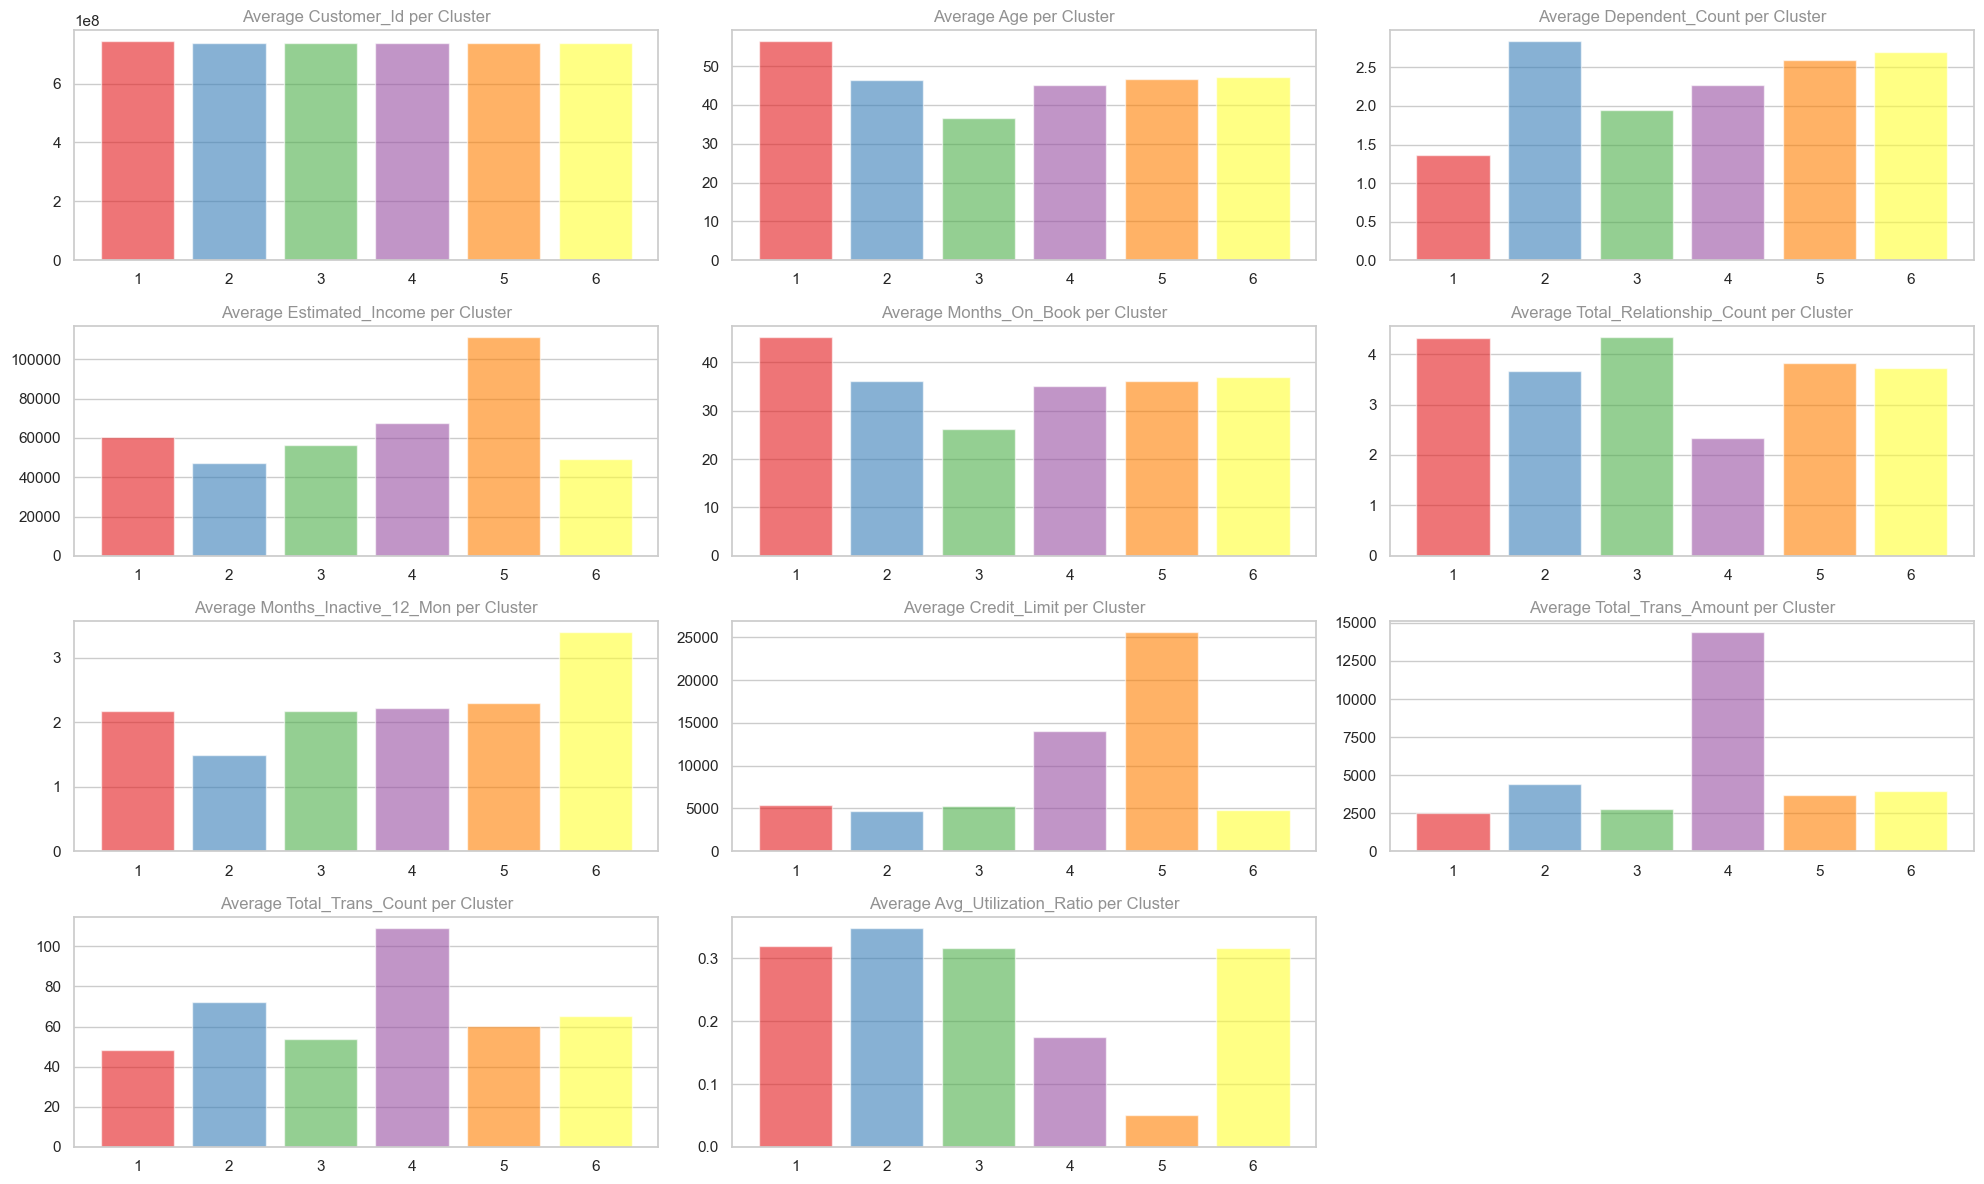

In [52]:
cluster_variable_distributions(results_df)

**Cluster distribution verse Variable Observations**

The above shows similar finds as the correlation and distribution plots in Section 2. For example:

- Cluster 5 is largely made of men as in the `gender` column men are mapped as `{male : 0}`. Cluster 5 has a only `Avg_Utilization_Ratio` and a high `Credit_Limit`, which confirms that men are under valued as customers as they spend little but have the highest spending power.

- Interestingly cluster for has a low `Total_Relationship_Count` but the highest `Total_Trans_Amount` potentially showing that this group is over targetted by promotions and advertising.

Next is cluster scatter plots highly correlated variables pairs, which should provide insights into how correlation between variables has led to separtion/cluster boundaries that clusters.



In [53]:
def plot_correlation_scatter(data_df: pd.DataFrame, 
                             correlation_df: pd.DataFrame, 
                             num_cols: int = 2, 
                             row_height: int = 4, 
                             cluster_col_name: str = 'cluster') -> None:
    """
    Plots scatter plots for all correlated pairs in the provided DataFrame.

    Parameters:
    data_df (DataFrame): The original data DataFrame.
    correlation_df (DataFrame): The DataFrame containing correlated pairs and their correlation scores,
                               calculated from the get_correlated_pairs() function.
    num_cols (int): The number of columns in the subplot grid (default: 2).
    row_height (int): The height of each subplot row (default: 4).
    cluster_col_name (str): The name of the column containing cluster labels (default: 'cluster').

    Returns:
    None
    """
    
    # Make a copy of the original data DataFrame
    data_df = data_df.copy()

    # Get the unique variables from the correlated pairs
    unique_vars = set()
    for pair in correlation_df['Correlated Pair']:
        unique_vars.update(pair)

    # Convert the set of unique variables back to a list
    unique_vars = list(unique_vars)

    # Create subplots based on the number of unique variable pairs
    num_plots = correlation_df.shape[0]
    num_rows = num_plots // num_cols
    if num_plots % num_cols != 0:
        num_rows += 1

    # Create a grid of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, row_height * num_rows))
    axs = axs.flatten()

    # Iterate through correlated pairs and create scatter plots
    for i, pair_row in correlation_df.iterrows():
        pair = pair_row['Correlated Pair']
        corr_score = pair_row['Correlation Score']

        x_var, y_var = pair

        # Create scatter plots with cluster information
        if i == 0 or i == num_plots-1:
            sns.scatterplot(x=x_var, y=y_var, hue=cluster_col_name, data=data_df,
                            palette='Set1', alpha=0.4, ax=axs[i], legend="full")
        else:
            sns.scatterplot(x=x_var, y=y_var, hue=cluster_col_name, data=data_df,
                            palette='Set1', alpha=0.4, ax=axs[i], legend=False)
            
        axs[i].set_title(f'{x_var.title()} vs. {y_var.title()} (Correlation: {corr_score:.2f})')

    # Hide any unused subplots
    for i in range(len(correlation_df), len(axs)):
        axs[i].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [56]:
# removing highlighly correlated pairs that are not easier to visualise using scatter plots
display_markdown('#### Correlations df before drop')
display(corr_pairs_df)
corr_pairs_df = corr_pairs_df.drop(index=[3,5,6]).reset_index()

display_markdown('#### Correlations df after drop')
display(corr_pairs_df)

#### Correlations df before drop

,Correlated Pair,Correlation Score
0,"(total_trans_amount, total_trans_count)",0.807192
1,"(age, months_on_book)",0.788912
2,"(estimated_income, credit_limit)",0.515863
3,"(gender, credit_limit)",-0.420806
4,"(credit_limit, avg_utilization_ratio)",-0.482965
5,"(gender, estimated_income)",-0.601792
6,"(marital_Married, marital_Single)",-0.741185


#### Correlations df after drop

,index,Correlated Pair,Correlation Score
0,0,"(total_trans_amount, total_trans_count)",0.807192
1,1,"(age, months_on_book)",0.788912
2,2,"(estimated_income, credit_limit)",0.515863
3,4,"(credit_limit, avg_utilization_ratio)",-0.482965


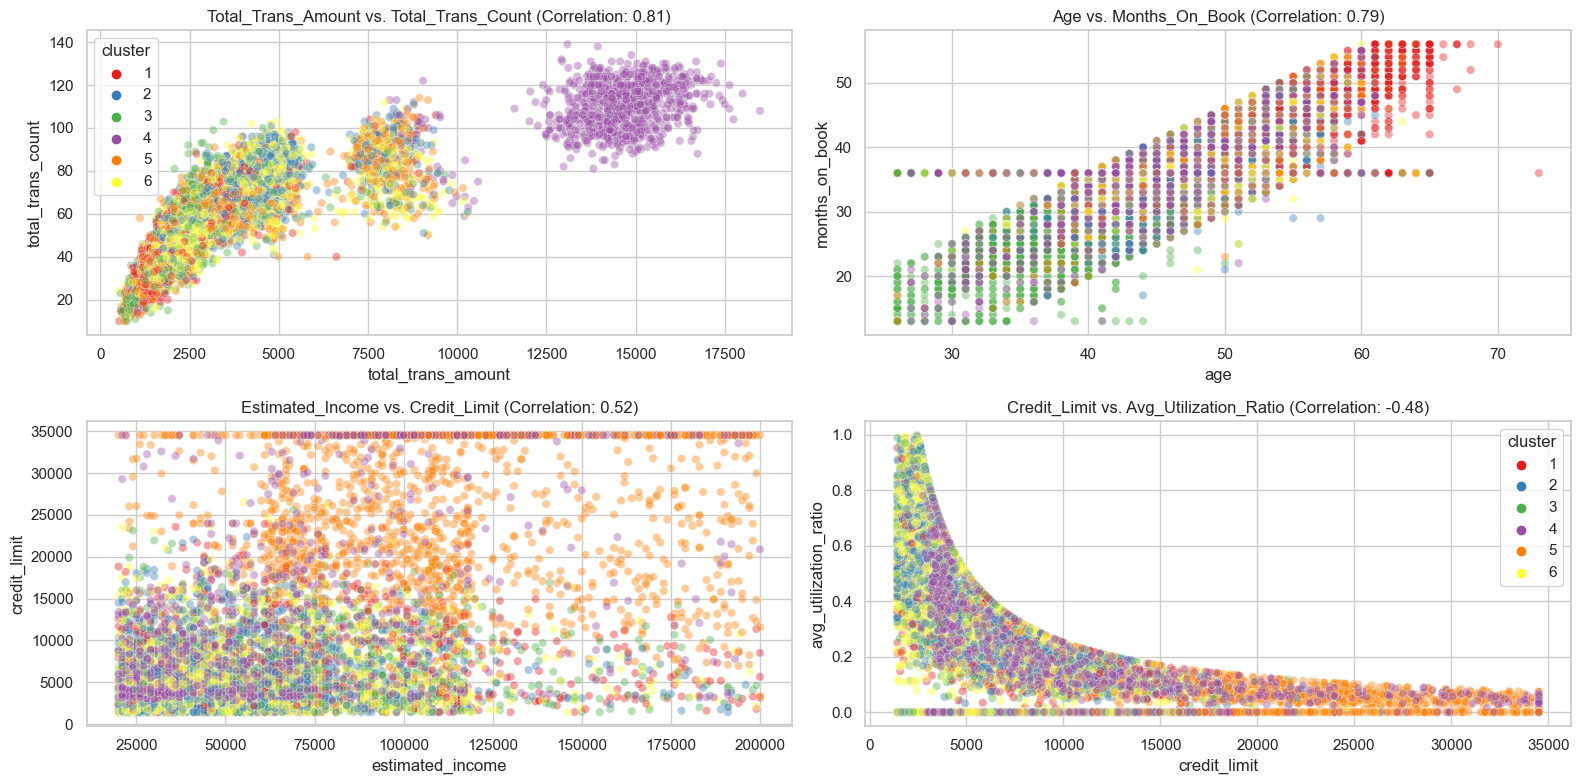

In [57]:
plot_correlation_scatter(results_df, corr_pairs_df)

**Cluster Scatter Plot Observations**

- The binary `gender` scatter plots although highly correlated are not a useful visualisation here.
- Cluster 4, spend the most in total and shop the most frequently, but also have a average to low credit score and income
- Cluster 5, which are known to be main male have the highest income and credit score, but have a low utilisation ratio, spending totol, and spending frequency.

Next visualisation of categroical variables distribution across the six clusters:

In [78]:
def categorical_col_percentual_dist(df, 
                                   cluster_col_name='cluster', 
                                   subplot_height=6,
                                   col_num=3,
                                   ) -> None:
    """
    Plots the distribution of categorical variables across different clusters.

    Parameters:
    df (DataFrame): The input data frame with cluster information and categorical variables.
    cluster_col_name (str): The name of the column containing cluster labels (default: 'cluster').
    subplot_height (int): The height of each subplot in the figure (default: 3).

    Returns:
    None
    """
    
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Getting number of rows for plot
    num_rows = len(categorical_cols)//col_num
    if len(categorical_cols)%col_num != 0:
        num_rows += 1
    
    fig = plt.figure(figsize=(20, subplot_height*num_rows))

    for i, column in enumerate(categorical_cols):
        
        df_plot = pd.crosstab(index=df[cluster_col_name], 
                              columns=df[column], values=df[column],
                              aggfunc='size', normalize='index'
                              )
        
        ax = fig.add_subplot(num_rows, col_num, i+1)
        
        df_plot.plot.bar(stacked=True, ax=ax, color=sns.color_palette('Set1'), alpha=0.6)
        ax.set_title(f'{column.title()} per Cluster', alpha=0.5)
        
        ax.set_ylim(0, 1.5)
        ax.legend(frameon=False)
        ax.xaxis.grid(False)

    plt.tight_layout()
    plt.show()


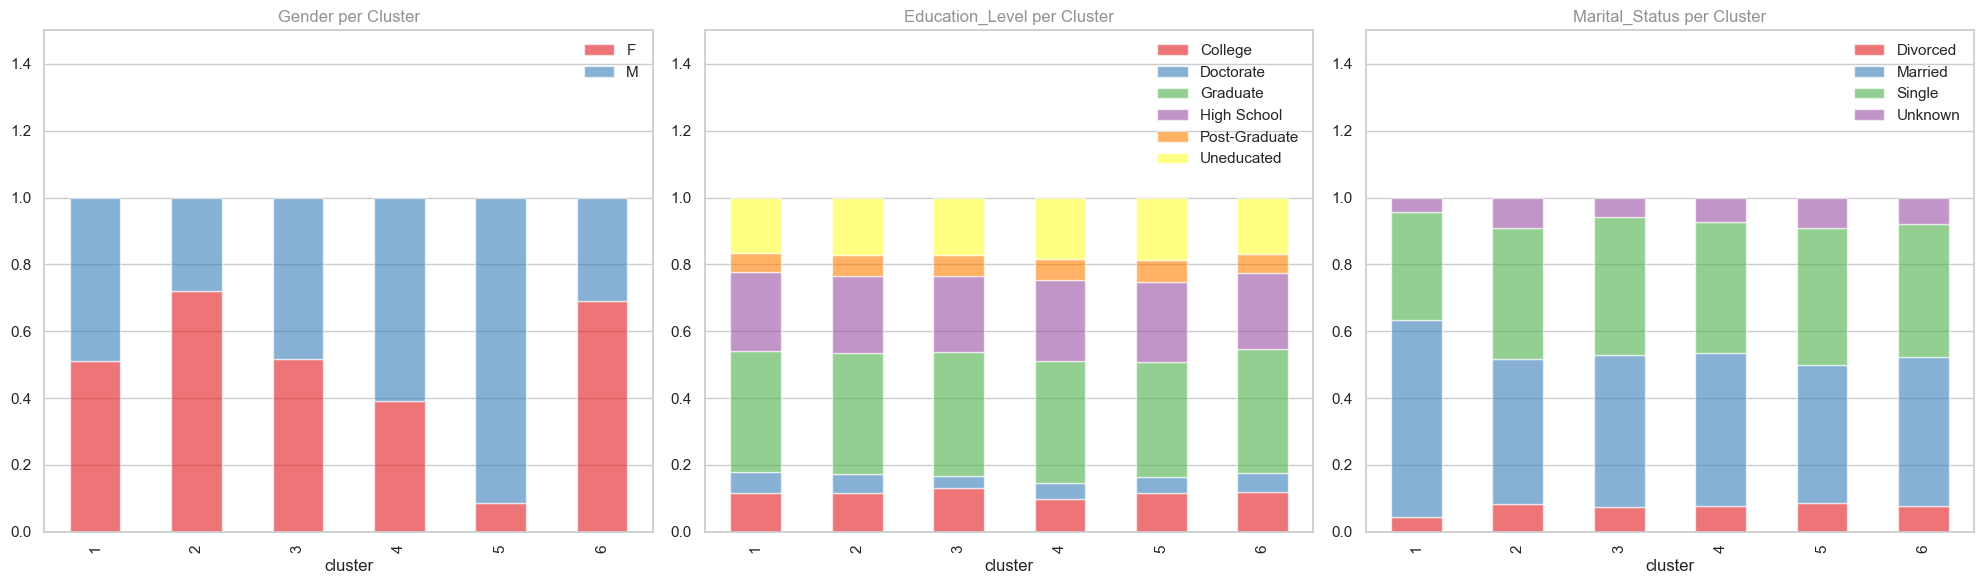

In [79]:
categorical_col_percentual_dist(results_df)

**Category per Cluster Bar Plot Observations**

- Education level is split quite evenly across all clusters
- Marital status is also split quite evenly across all clusters
- Cluster five is large comparised of men with high incomes, who are low spenders and who have large credit limits


## 6. Short Conclusion and Further Work
---

From the analysis and cluster model creation through unsupervised machine learning it is clear that the lays a group of men (cluster 5) aged on average around 45 years that have large incomes but do not utilise their credit card. This could account to there not being a need for this group as they see no need to brower - this is however, speculative. There is also a group of people (cluster 3) with near even gender spit that have average incomes that spend the most with their cards.   

**Recommendations/Future Work**
- Taget with promotions cluster 5, men ages on average 45 with large relative incomes. The promotions could offer benefits for use of card, for example Air travel points, etc. It does not make sense to incresae there limits as there are already high.

- Cluster 3, the heavy user group could have their limits increased if it is safe to do so.

- Try modelling with 5 and 7 cluster instead of 6 and compare the results

- Increase the number of data points if possible

- Deeper analysis on martical status, gender and spending

- Look to understand why cluster 3 are heavy users and why cluster 5 is not. There is like a lot more to this story, so furhter analysis is need before advertising and promotional campaigns are started.